# Linear models for Classification 

* Logistic regression
* Support vectors

In [1]:
# Load files from introML 
import sys
import os
targetDirectory = os.path.abspath("../../introML/")
sys.path.append(targetDirectory)

%matplotlib inline
from preamble import *
# import graphviz
from sklearn.model_selection import train_test_split

# Quick plot of logistic regression and Linear SVC

C:\Users\bleba\AppData\Local\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bleba\AppData\Local\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


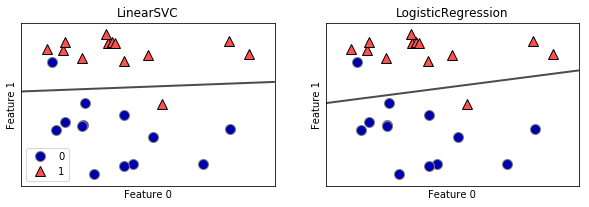

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

## Quick demo of function calls
* Note how the syntax is completely the same
* Try a few different C
* Wish this data set were longer
* Create a function to make our own data

In [3]:
# function to make random classes
# X random with 10 components (0,1,2,3,4,5,6,7,8,9)
# prob(y=1) depends on the sum of X[:,0] and X[:,1]
# x[:,2] through x[:,9] are useless
def make_Class(n):
    # two Forecast variables, both uniform, 8 irrelevant variables x[:,2:10]
    X = np.random.uniform(low=0.,high=0.5,size=(n,10))
    # prob(y=1) is sum of the x components (0 and 1) 
    p = np.sum(X[:,0:2],axis=1)
    y = (np.random.uniform(low=0.,high=1.,size=n)<p)
    return X,y

In [13]:
# slow down and demo the two model calls
X,y = make_Class(40)
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, test_size=0.5)

# logistic
logisticMod = LogisticRegression(penalty='l2',C=1.0,solver="lbfgs",max_iter=500)
logisticMod.fit(X_train,y_train)
print('Logistic (Train/Test) accuracy')
print(logisticMod.score(X_train,y_train))
print(logisticMod.score(X_test,y_test))

# linear SVC
LinearSVCMod = LinearSVC(C=10000.,max_iter=500000)
LinearSVCMod.fit(X_train,y_train)
print('Linear SVC (Train/Test) accuracy:')
print(LinearSVCMod.score(X_train,y_train))
print(LinearSVCMod.score(X_test,y_test))
print('fraction y = 1')
print(np.mean(y))

Logistic (Train/Test) accuracy
0.85
0.55
Linear SVC (Train/Test) accuracy:
1.0
0.55
fraction y = 1
0.575


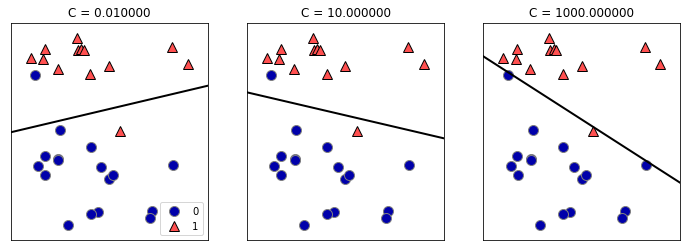

In [5]:
mglearn.plots.plot_linear_svc_regularization()

## Breast cancer demo

In [16]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(C=1.,penalty="l2",solver="lbfgs",max_iter=50000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.958
Test set score: 0.958


In [18]:
logreg100 = LogisticRegression(C=100.,penalty="l2",solver="lbfgs",max_iter=50000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.984
Test set score: 0.965


In [19]:
logreg001 = LogisticRegression(C=0.01,penalty="l2",solver="lbfgs",max_iter=50000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.951


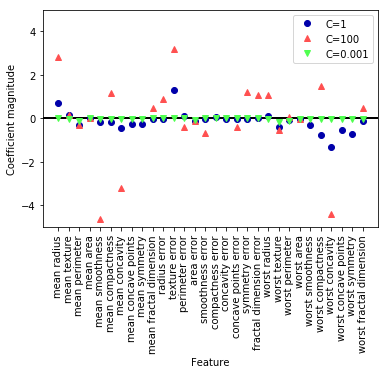

In [20]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


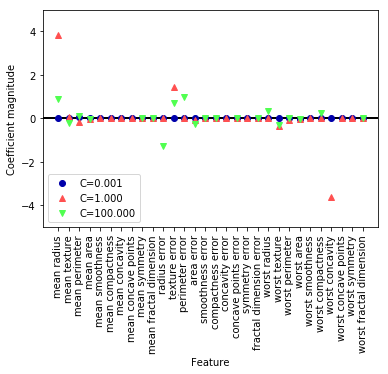

In [23]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1",solver="liblinear",max_iter=50000).fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

### A quick look back into linear SVC
* Note how easy this change is

In [26]:
# Try putting in some different values for C
linSVC = LinearSVC(C=1.,max_iter=500000).fit(X_train,y_train)
print("Training set score: {:.3f}".format(linSVC.score(X_train, y_train)))
print("Test set score: {:.3f}".format(linSVC.score(X_test, y_test)))

Training set score: 0.965
Test set score: 0.951


C:\Users\bleba\AppData\Local\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### There is randomness in the SVC fitting routines, be careful

In [32]:
# This is an algorithm w/o random search
# see how results don't vary
# can also lock the seed in LinearSVC if needed
linSVC = LinearSVC(C=1.,random_state=0,max_iter=100000).fit(X_train,y_train)
print("Training set score: {:.3f}".format(linSVC.score(X_train, y_train)))
print("Test set score: {:.3f}".format(linSVC.score(X_test, y_test)))


Training set score: 0.589
Test set score: 0.573


C:\Users\bleba\AppData\Local\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Linear models for multiclass classification

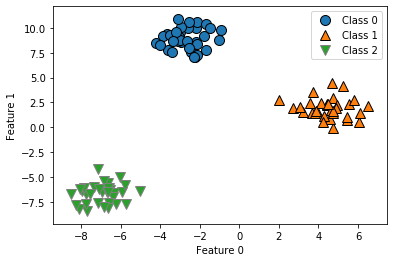

In [5]:
from sklearn.datasets import make_blobs
import mglearn
import matplotlib.pyplot as plt
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [10]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


In [11]:
linear_svm.coef_

array([[-0.17492373,  0.23140727],
       [ 0.4762191 , -0.06937456],
       [-0.18914127, -0.20400625]])

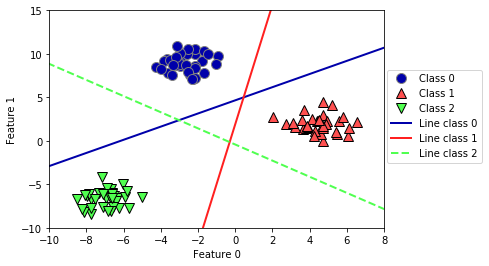

In [30]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

## One versus others
* Big regions are easy  
* Right panel
    * red beats (blue,green), (red,blue) beats green, (red,green) beats blue
* Some regions are not clear
* Upper right panel
    * red beats (blue,green), (red,blue) beats green, blue beats (green, red)
* Middle panel also a problem
* In all cases SciKit learn uses distance to boundary (see fig below)

Text(0,0.5,'Feature 1')

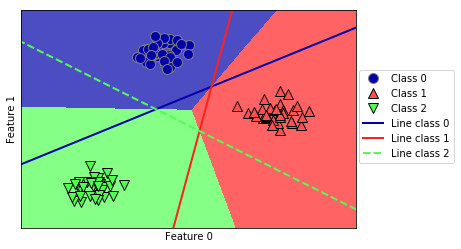

In [31]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# Summary
* Many basic classification tools
* Some with probability theory

    * Logistic
    * Naive Bayes
    * Discriminant
    
* Some clean computer modeling

    * Support vectors
    * Nonlinear versions of these coming soon
    
* Multi-class problems can be tricky
    

# A quick Python note:  Method Chaining
* How to string methods together in python
* General methods:  fit(), predict()
* They are applied to the object to the left of them
* This is a coveniet part of Python syntax and SciKit Learn

In [ ]:
# instantiate model and fit it in one line
logreg = LogisticRegression().fit(X_train, y_train)

In [ ]:
logreg = LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test)

In [ ]:
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)